<a href="https://colab.research.google.com/github/qa21336/HousingStatisticsAnalysis-/blob/main/src/MortgageRate_Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


<Axes: xlabel='year'>

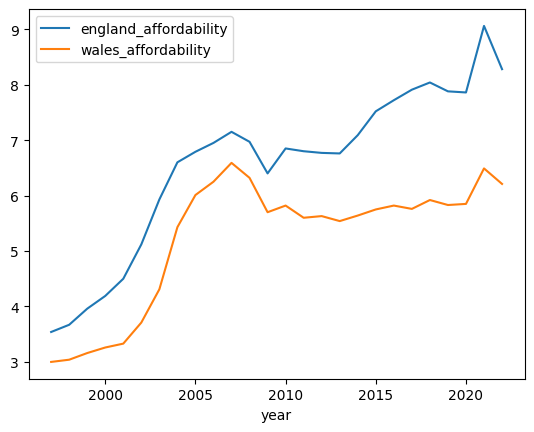

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

affordability = pd.read_csv('/content/drive/MyDrive/ADS Datasets/Copy of 3.House_price_to_workplace-based_earnings_ratio.csv')
affordability = affordability.to_numpy()

aff_years = aff_eng = affordability[0,2:-1]
aff_eng = affordability[2,2:-1]
aff_wal = affordability[12,2:-1]

affordability = np.stack((aff_years, aff_eng, aff_wal)).astype(float) #merge data
affordability = affordability[:, ~np.isnan(affordability).any(axis=0)] #remove weird nans
affordability =  pd.DataFrame(np.transpose(affordability),columns=['year','england_affordability','wales_affordability']).astype(str)
affordability.iloc[:,0] = affordability.iloc[:,0].astype(float).astype(int).astype(str)


employment = pd.read_csv('/content/drive/MyDrive/ADS Datasets/statistic_id281992_employment-rate-in-the-uk-1971-2024 (2).csv')
employment = employment.to_numpy()
emp_date = employment[2:-1,0]
emp_date = [y[-4:] for y  in emp_date] #just the year
emp_rate = employment[2:-1,1]
employment = pd.DataFrame(np.transpose(np.stack((emp_date,emp_rate))), columns = ['year','mortgage_rate'])
employment = employment.groupby('year').mean().astype(str) #mean the years

data = pd.merge(affordability, employment, on='year',how='outer')#.astype(float)


inflation = pd.read_csv('/content/drive/MyDrive/ADS Datasets/HVMRUKQ (1).csv')
inflation = inflation.to_numpy().astype(str)
inflation[:,0] = [y[:4] for y  in inflation[:,0]] #just the year
inflation = pd.DataFrame(inflation,columns=['year','inflation'])

data = pd.merge(data, inflation, on='year',how='outer').astype(float)
data = data.sort_values(by='year')

data.plot(x = 'year', y=['england_affordability','wales_affordability'])


<Axes: xlabel='year'>

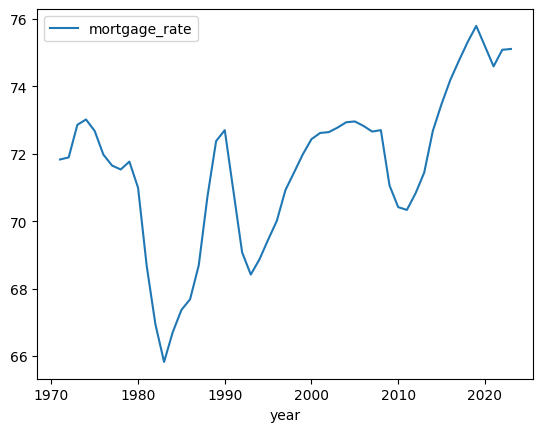

In [2]:
data.plot(x = 'year', y=['mortgage_rate'])

<Axes: xlabel='year'>

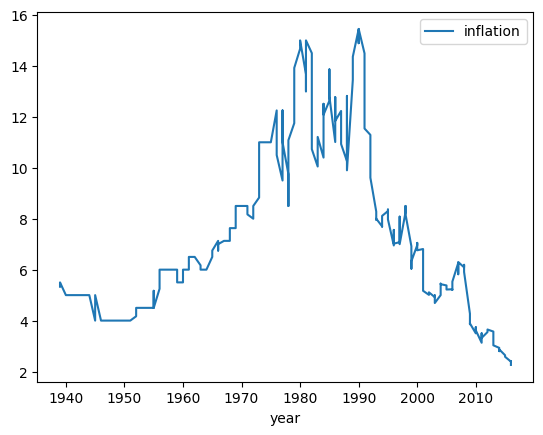

In [3]:
data.plot(x = 'year', y=['inflation'])